In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_csv("day.csv")
df #inspecting the rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* The above step shows that there are no null values and gives us an idea about the datatype

In [5]:
df.describe() # we get all the statistical data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.size

11680

In [7]:
#Dimensions of the data
df.ndim

2

###### There are 730 rows and 16 columns in the data set and there are no null values

##### Let us consider dropping undesired columns

* The column 'instant' seems to be a sequence much like the index number
* The column 'dteday' seems to be the different dates instead we could use the number of days as a column
* The columns 'casual' and 'registered' basically constitutes the target

In [8]:
#Adding a new column
#df['days'] = (pd.to_datetime(df['dteday'], format = '%d-%m-%Y') - pd.to_datetime(df['dteday'][0], format = '%d-%m-%Y')).dt
df['days'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [10]:
#Removing 'instant', 'dteday', 'casual' and 'registered'

df.drop(['instant', 'dteday', 'casual', 'registered'], axis= 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days        730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [12]:
#Trying to make sense of the 'Season' column in the database
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
#Trying to make sense of the 'weathersit' column in the database
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


###### Findings:
* Looks like the 'season' and 'weathersit' columns contain non-integer values and the integers are indicative

* Looks like 'temp' and 'atemp' has the highest correlation

In [15]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days'],
      dtype='object')

In [16]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days          730
dtype: int64

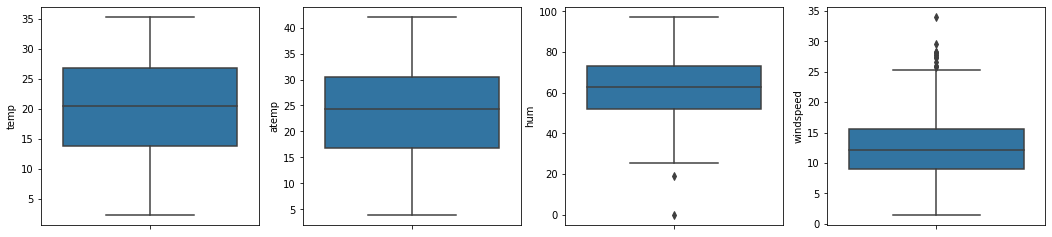

In [17]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

##### These plots suggest there are minimal outliers and will not effect the model

In [18]:
# Let's replace the indicative integral values with non-integral values

df.season.replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4:'Autumn'}, inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,Winter,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,Winter,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,Winter,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,Winter,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,Winter,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1080x2160 with 0 Axes>

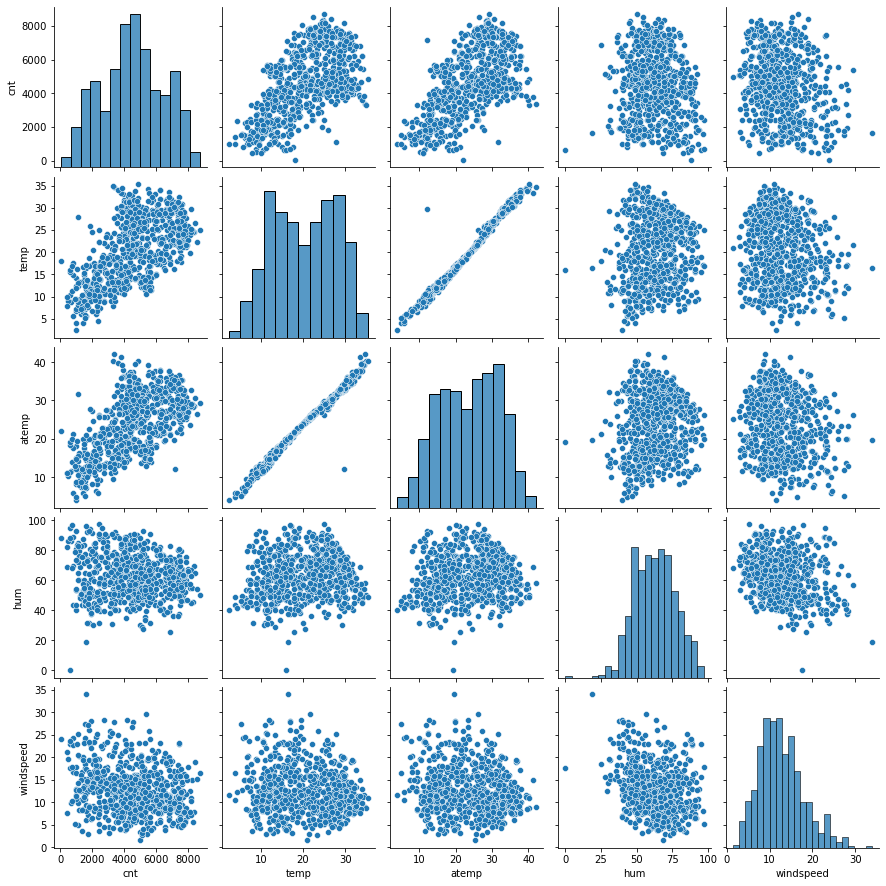

In [19]:
#Pairplots for the numeric variables
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

###### Much like the correlation values we can see that there is a very high correlation between 'temp' and 'atemp' column

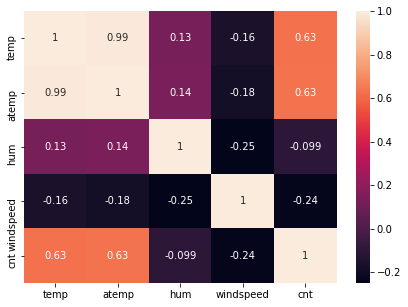

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot = True)
plt.show()

###### Heatmap correlation between all the variables of the dataframe

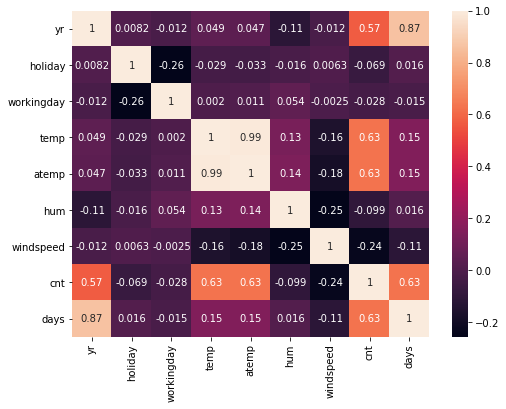

In [21]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)
plt.show()

#### From the heatmap the fields that are highly correlated are:
* yr
* temp
* atemp
* days

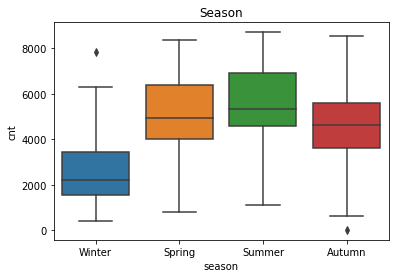

In [22]:
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Season')
plt.show()

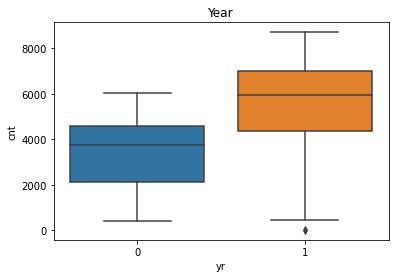

In [23]:
sns.boxplot(x='yr', y='cnt', data=df)
plt.title('Year')
plt.show()

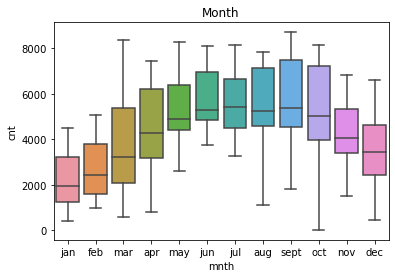

In [24]:
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Month')
plt.show()

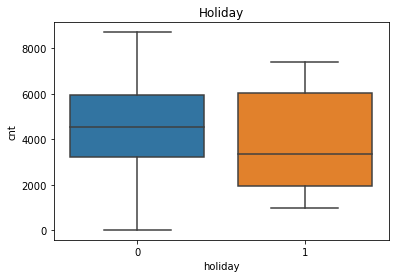

In [25]:
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Holiday')
plt.show()

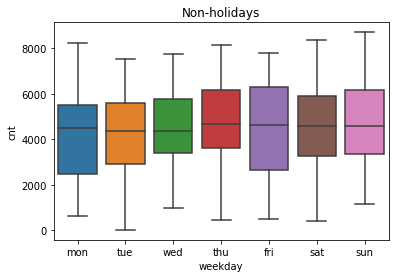

In [26]:
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Non-holidays')
plt.show()

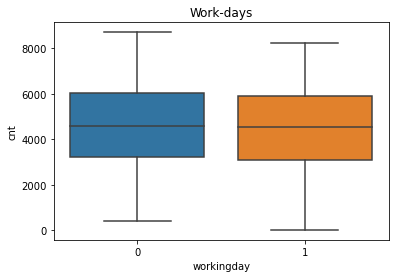

In [27]:
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title('Work-days')
plt.show()

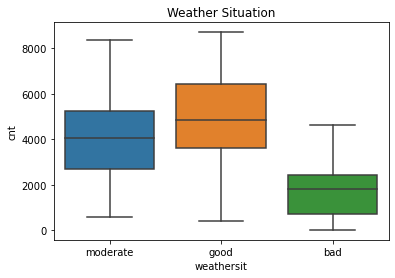

In [28]:
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title("Weather Situation")
plt.show()

##### The insights we get from the above box plots are as follows:

* In the Season boxplot we can see that the highest demand is in the Summer season 
* In the Year boxplot we can see that the demand is higher in the second year
* In the month box plot we can see that the highest demand is in the month of Septemeber however we also notice that the rate of demand increases till June
* In the holidays boxplot we can conclude that the demand is less in holidays 
* In the Weekdays boxplot we can see the demand is a little higher on the Thursday but the rate is not that significant. Most of them are closeby
* In the Weather Situation boxplot we can see that the highest demand is there when the weather condition is good

##### To conclude we can say that the Weather type and the season plays a major role in the categorical type of data on the demand of the cycles

In [29]:
# Let's understand the roile of Temperature, Windspeed and humidity on the target variable

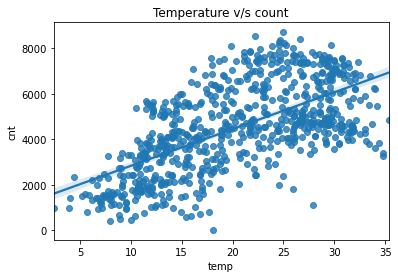

In [30]:
sns.regplot(data=df, y ='cnt', x = 'temp')
plt.title("Temperature v/s count")
plt.show()

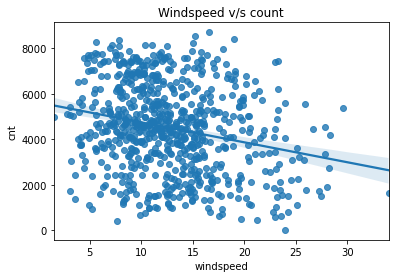

In [31]:
sns.regplot(data=df, y ='cnt', x = 'windspeed')
plt.title("Windspeed v/s count")
plt.show()

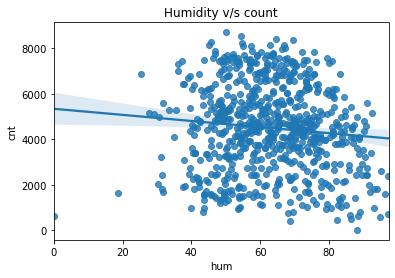

In [32]:
sns.regplot(data=df, y ='cnt', x = 'hum')
plt.title("Humidity v/s count")
plt.show()

#### Insights:
* Temperature has a positive impact on the demand of the cycles
* High Wind-speed show a steep downward trend in terms of demand
* The Humididty also tends to lower the demand but then it is more or less scattered

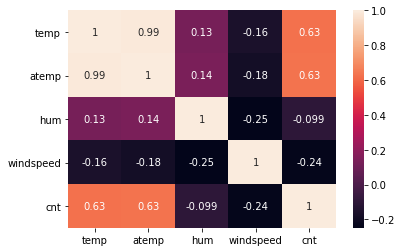

In [33]:
values = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.heatmap(df[values].corr(), annot = True)
plt.show()

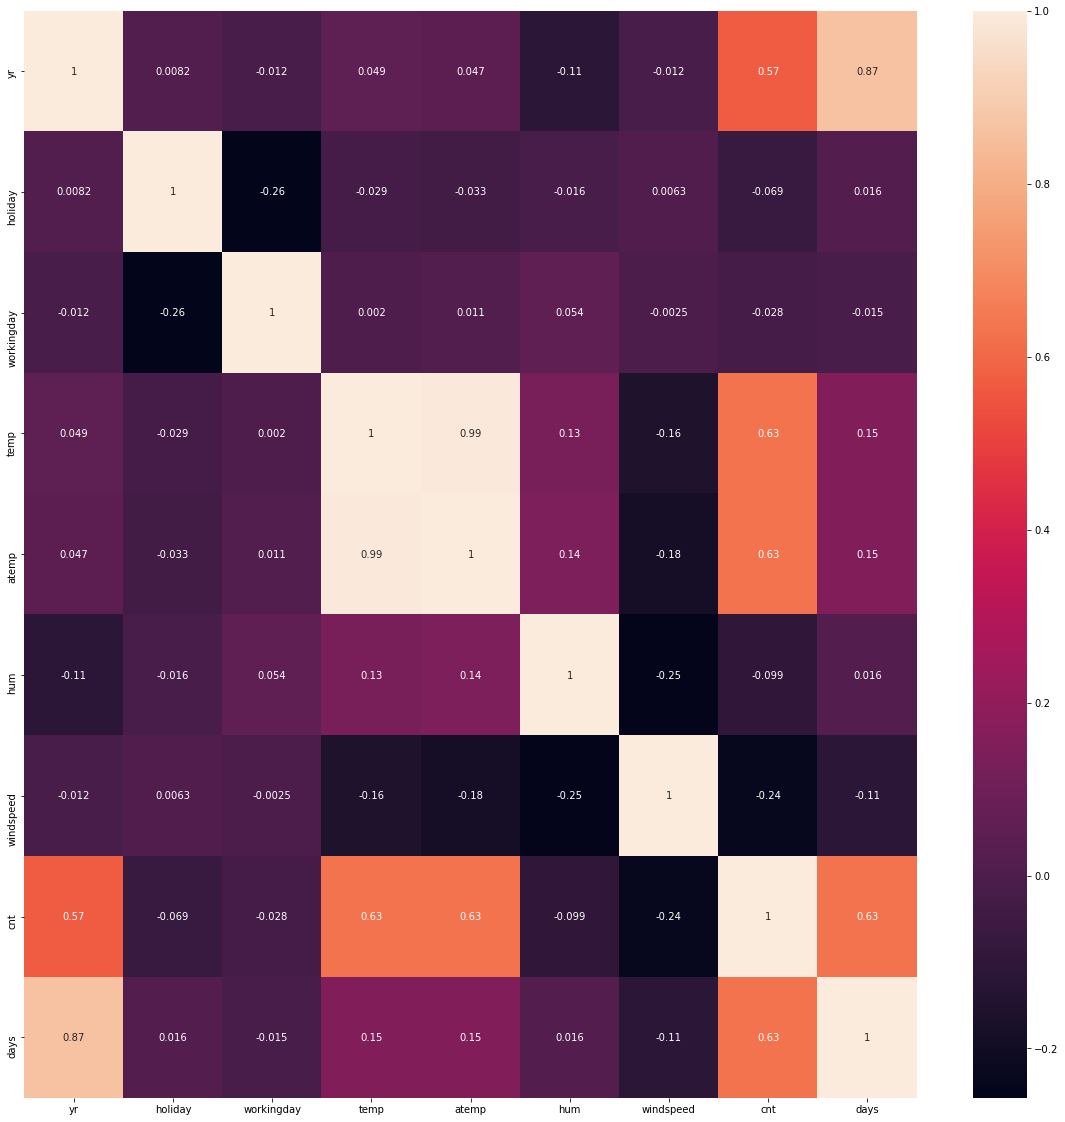

In [34]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

##### Insights:
* temp and atemp seem to be highly correlated with the count
* Guess we can remove either of them since they seem to be highly correlated with eachother as well

In [35]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days
0,Winter,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,Winter,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,Winter,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,Winter,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,Winter,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [36]:
# Creating dummy variables for all categorical values
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_Spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
# In order to get a better understanding let's look at all the columns and then the info

df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   days                 730 non-null    int64  
 9   season_Spring        730 non-null    uint8  
 10  season_Summer        730 non-null    uint8  
 11  season_Winter        730 non-null    uint8  
 12  mnth_aug             730 non-null    uint8  
 13  mnth_dec             730 non-null    uint8  
 14  mnth_feb             730 non-null    uint8  
 15  mnth_jan             730 non-null    uin

In [39]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days,season_Spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000,0.252055,...,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.634247,0.336986
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136,0.434490,...,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.481971,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
print('The shape of the dataframe now is :', df.shape)

The shape of the dataframe now is : (730, 32)


In [41]:
# Now we split the test and train data

In [42]:
y = df.pop('cnt')
X = df

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [43]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_Spring,season_Summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
X_train.shape

(511, 31)

In [45]:
X_test.shape

(219, 31)

In [46]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

* The features are not in the same scale 
* Therefore we will scale them using the MinMaxScaler

In [47]:
vals = ['temp', 'atemp', 'hum', 'windspeed', 'days']

scaler = MinMaxScaler()
X_train1 = X_train
X_train1[vals] = scaler.fit_transform(X_train[vals])

<ipython-input-47-a846db01c3a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train1[vals] = scaler.fit_transform(X_train[vals])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [48]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_Spring,season_Summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.258317,0.260274,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.438138,0.439214,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_Spring,season_Summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,1,0,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


In [50]:
lReg = LinearRegression()
lReg.fit(X_train, y_train)

LinearRegression()

In [51]:
#Let's reduce the number of features to 10 using Recursive Feature Elimination
rfe = RFE(lReg, 15)
rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


RFE(estimator=LinearRegression(), n_features_to_select=15)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 9),
 ('mnth_jul', False, 13),
 ('mnth_jun', False, 7),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 5),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 10),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 2)]

In [53]:
def model(col):
    X_train_sm = sm.add_constant(X_train[col])
    model = sm.OLS(y_train, X_train_sm).fit()
    print(model.summary())
    return model


In [54]:
def vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [55]:
#Columns still present after the RFE

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_mar',
       'mnth_oct', 'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [56]:
col

'windspeed'

In [57]:
#columns rejected by RFE

X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_may', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [58]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp',
                      'hum', 'windspeed', 'season_Summer', 'season_Winter',
                      'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
                      'weathersit_bad', 'weathersit_moderate']]
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_Summer,season_Winter,mnth_jan,mnth_jul,mnth_sept,weekday_sat,weathersit_bad,weathersit_moderate
683,1,0,1,0.327133,0.639330,0.327101,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.731215,0.419004,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.509660,0.708724,0,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.785745,0.415925,0,1,0,0,0,0,0,1
640,1,0,1,0.745598,0.817947,0.110593,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,1,0.405237,0.543468,0.621696,0,1,0,0,0,0,0,0
106,0,0,1,0.495350,0.494203,0.704080,0,0,0,0,0,0,0,0
270,0,0,1,0.717562,0.874624,0.316186,0,0,0,0,1,0,0,1
435,1,0,1,0.507811,0.504079,0.464173,0,1,0,0,0,0,0,0


In [59]:
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

model(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.70e-181
Time:                        09:35:24   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3576.3701    

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif(col)

               Features    VIF
3                  temp  22.46
4                   hum  20.70
2            workingday   5.92
5             windspeed   5.38
7         season_Summer   4.68
8         season_Winter   2.65
6         season_Spring   2.63
14  weathersit_moderate   2.17
0                    yr   2.05
12          weekday_sat   1.96
10             mnth_jul   1.85
9              mnth_jan   1.69
11            mnth_sept   1.48
13       weathersit_bad   1.24
1               holiday   1.20


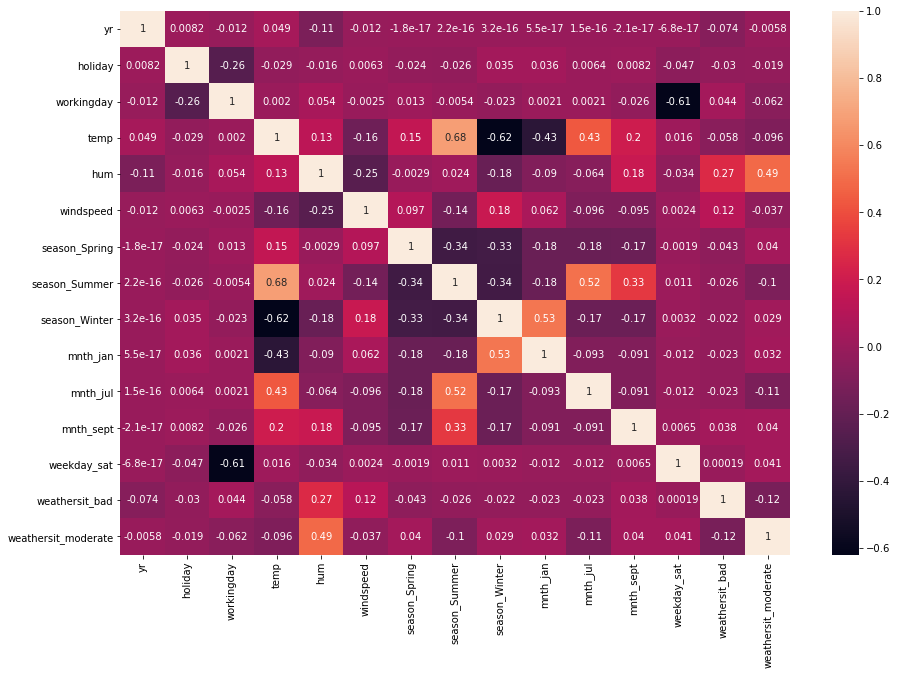

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(df[col].corr(), annot=True)
plt.show()

##### Findings:
* The weekday_sat has the highest p-value
* The VIF value seems to be low though

###### Thus we drop the weekday_sat column

In [62]:
#Defining a function to avoid repeatitive code
def rebuild(col, dispose):
    col.remove(dispose)
    model(col)
    vif(col)
    plt.figure(figsize=(15,10))
    sns.heatmap(df[col].corr(), annot=True)
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.44e-182
Time:                        09:35:27   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8364.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3535.3210    

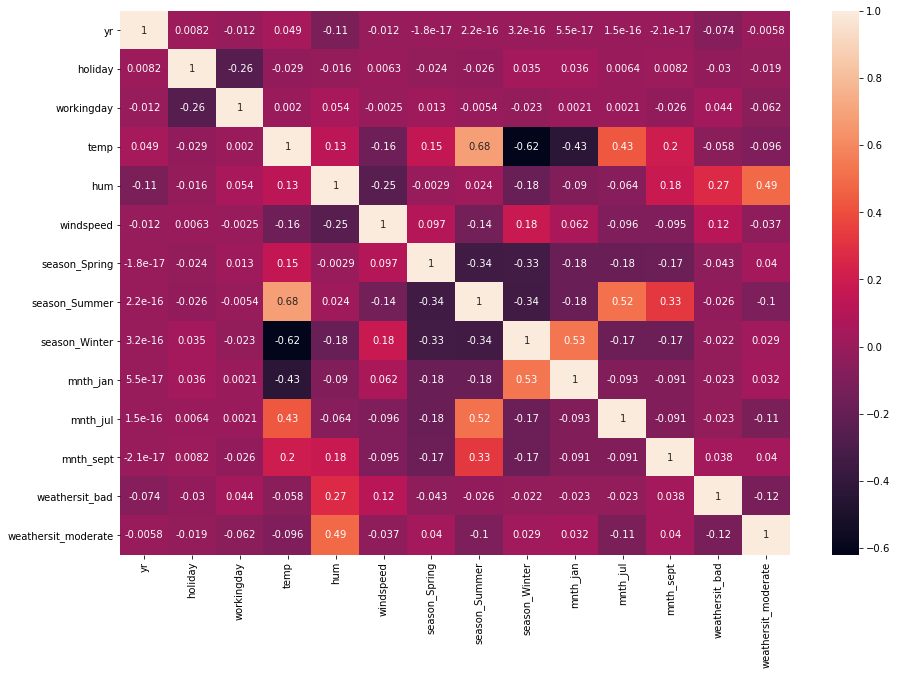

In [63]:
rebuild(col,'weekday_sat')

In [64]:
col

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'mnth_jan',
 'mnth_jul',
 'mnth_sept',
 'weathersit_bad',
 'weathersit_moderate']

##### Findings:
* The mnth_jan column seems to have a negative coefficient
* The p-value is also pretty high

###### Thus we drop the weekday_sat column since it is insignificant

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.10e-183
Time:                        09:35:30   Log-Likelihood:                -4135.1
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     497   BIC:                             8358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3526.7681    

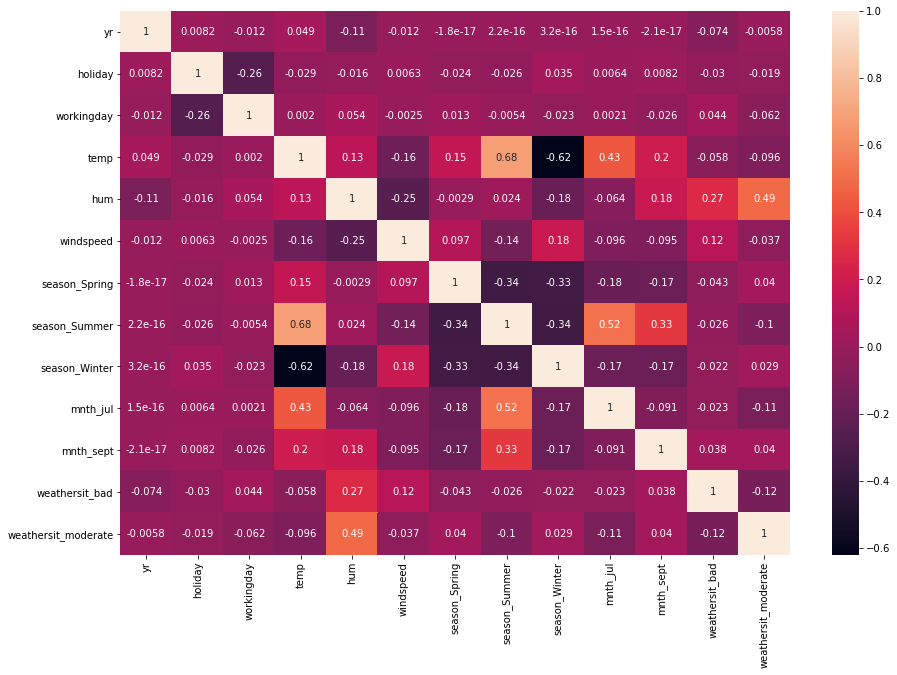

In [65]:
rebuild(col,'mnth_jan')

In [66]:
col

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'mnth_jul',
 'mnth_sept',
 'weathersit_bad',
 'weathersit_moderate']

##### Findings:
* The p value of all the columns seem to be <0.05
* The VIF of temp seems to be the highest

###### Thus we drop the temp column

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.52e-147
Time:                        09:35:33   Log-Likelihood:                -4223.7
No. Observations:                 511   AIC:                             8473.
Df Residuals:                     498   BIC:                             8528.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5078.5802    

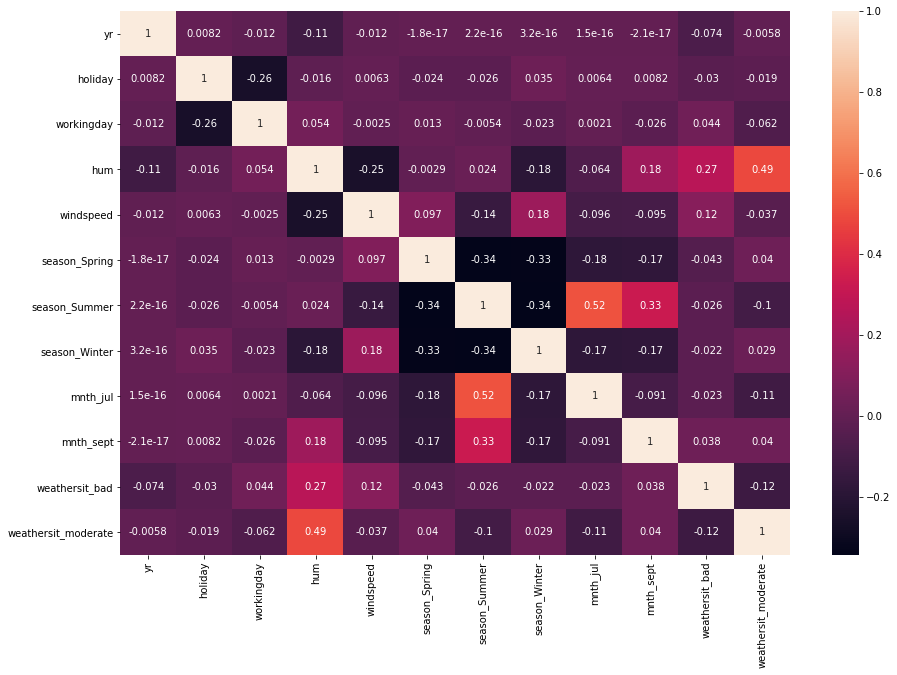

In [67]:
rebuild(col, 'temp')

In [68]:
col

['yr',
 'holiday',
 'workingday',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'mnth_jul',
 'mnth_sept',
 'weathersit_bad',
 'weathersit_moderate']

##### Findings:
* The hum column seems to have a negative coefficient
* The p-value is also pretty high
* The VIF value is also very high

###### Thus we drop the hum column

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.19e-148
Time:                        09:35:35   Log-Likelihood:                -4224.7
No. Observations:                 511   AIC:                             8473.
Df Residuals:                     499   BIC:                             8524.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4704.4559    

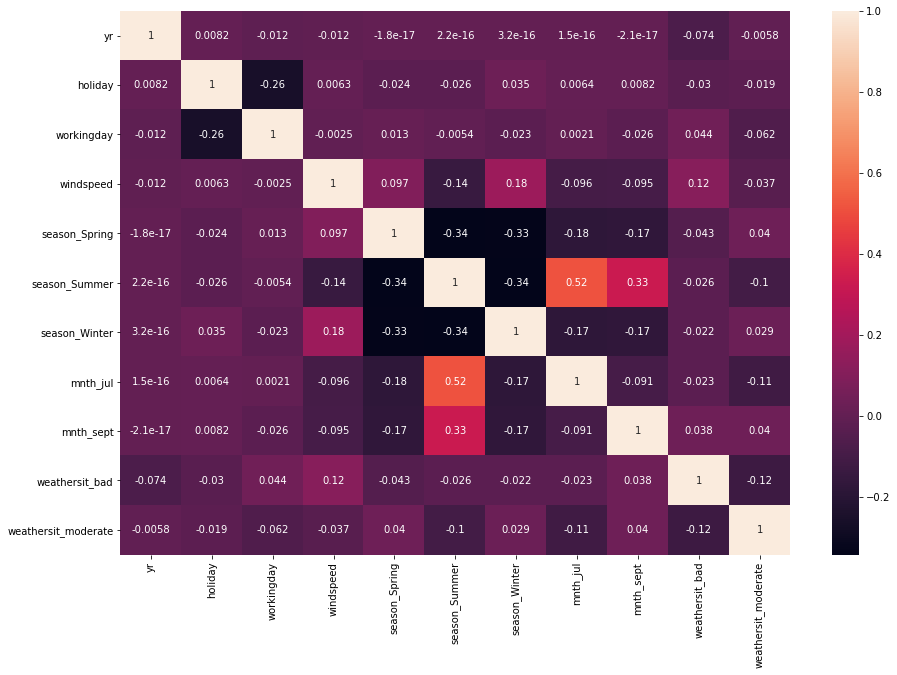

In [69]:
rebuild(col, 'hum')

In [70]:
col

['yr',
 'holiday',
 'workingday',
 'windspeed',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'mnth_jul',
 'mnth_sept',
 'weathersit_bad',
 'weathersit_moderate']

##### Findings:
* The mnth_jul column seems to have a negative coefficient
* The p-value is highest
* The VIF values look good

###### Thus we drop the mnth_jul column

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     161.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.52e-149
Time:                        09:35:37   Log-Likelihood:                -4224.7
No. Observations:                 511   AIC:                             8471.
Df Residuals:                     500   BIC:                             8518.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4706.2191    

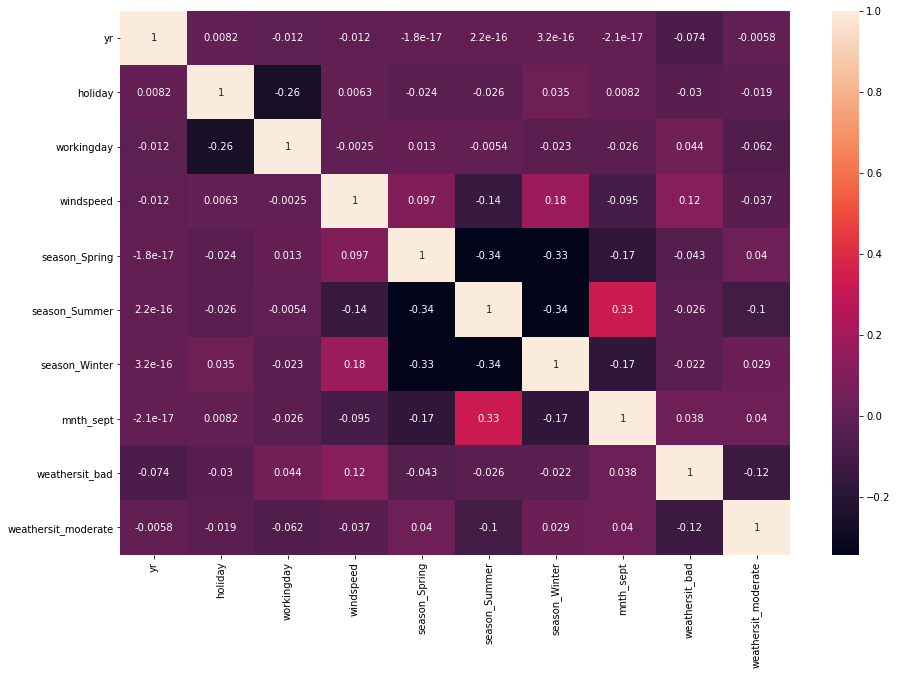

In [71]:
rebuild(col, 'mnth_jul')

##### Findings:
* The season_Spring column seems to have a positive coefficient
* The p-value is highest
* The VIF values look good

###### Thus we drop the season_Spring column

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     176.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          4.06e-149
Time:                        09:35:39   Log-Likelihood:                -4227.9
No. Observations:                 511   AIC:                             8476.
Df Residuals:                     501   BIC:                             8518.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4823.8288    

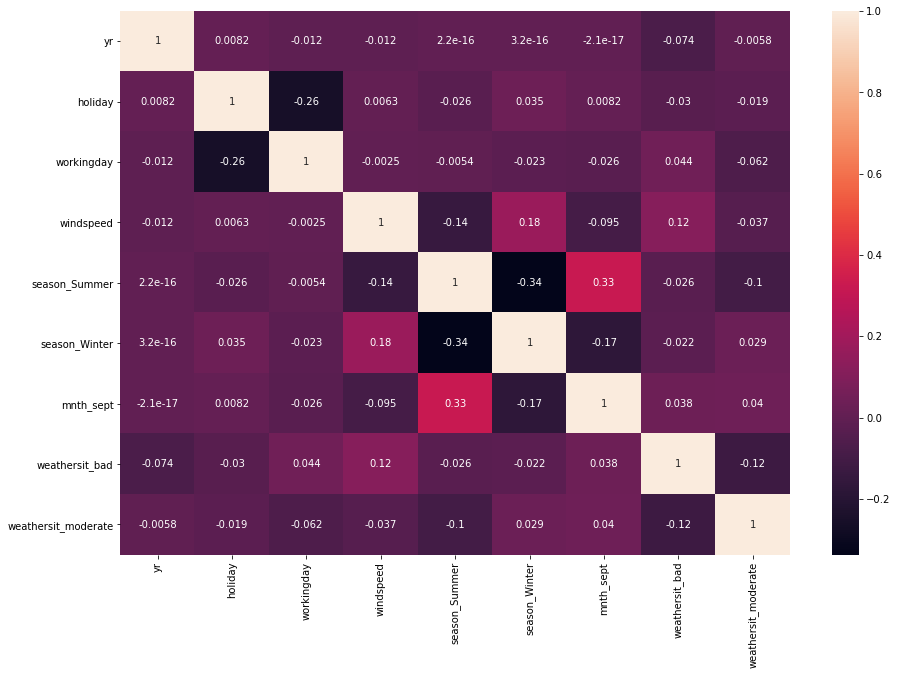

In [72]:
rebuild(col,'season_Spring')

##### Findings:
* The holiday column seems to have a negative coefficient
* The p-value is highest
* The VIF values look good

###### Thus we drop the holiday column

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     192.8
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.02e-147
Time:                        09:35:41   Log-Likelihood:                -4233.9
No. Observations:                 511   AIC:                             8486.
Df Residuals:                     502   BIC:                             8524.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4725.8744    

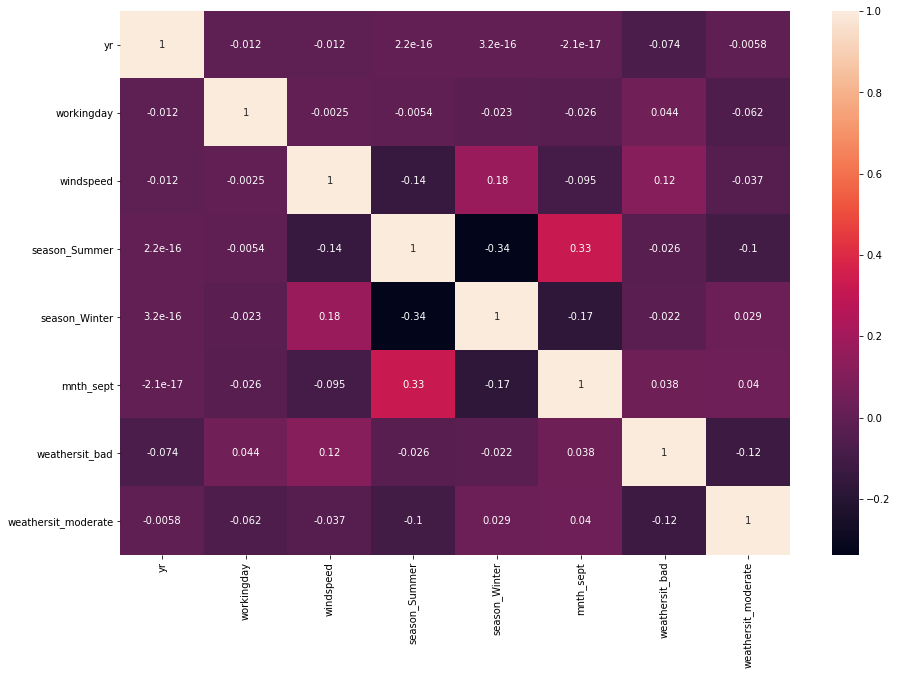

In [73]:
rebuild(col, 'holiday')

##### Findings:
* The workingday column seems to have a negative coefficient
* The p-value is highest
* The VIF values look good

###### Thus we drop the workingday column

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     219.5
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.85e-148
Time:                        09:35:42   Log-Likelihood:                -4235.0
No. Observations:                 511   AIC:                             8486.
Df Residuals:                     503   BIC:                             8520.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4629.2367    

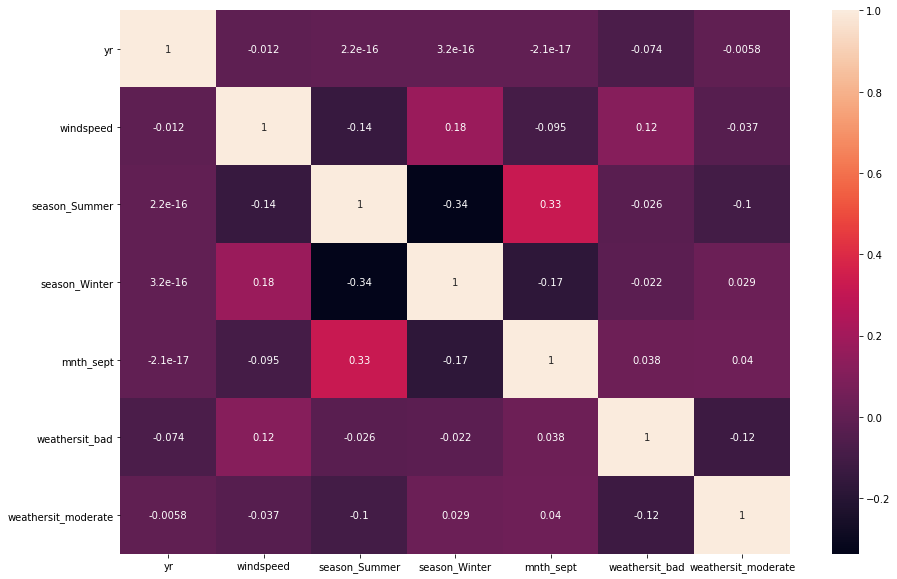

In [74]:
rebuild(col, 'workingday')

##### Findings:
* The mnth_sept column seems to have a negative coefficient
* The p-value is highest
* The VIF values look good

###### Thus we drop the mnth_sept column

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     247.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.19e-146
Time:                        09:35:43   Log-Likelihood:                -4242.1
No. Observations:                 511   AIC:                             8498.
Df Residuals:                     504   BIC:                             8528.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4661.8151    

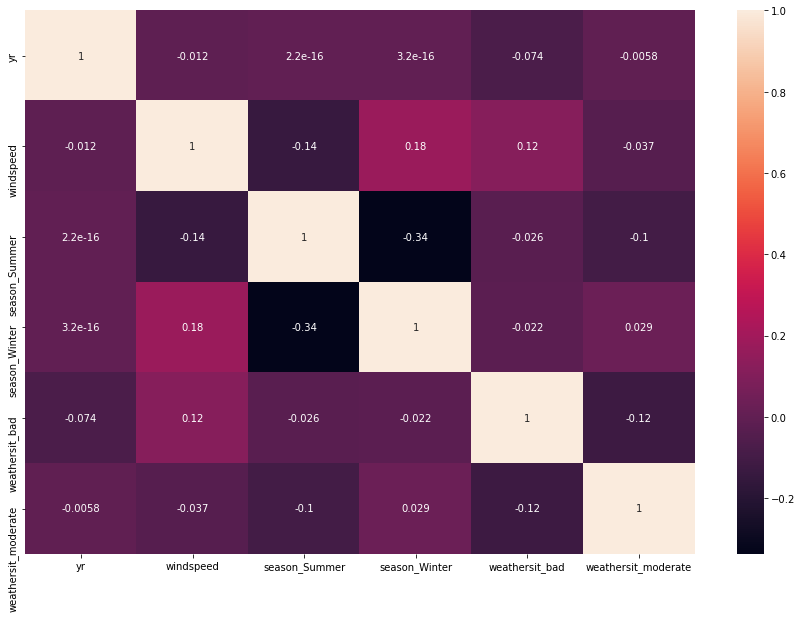

In [75]:
rebuild(col, 'mnth_sept')

##### Findings:
* The windspeed column seems to have a negative coefficient
* The p-value is 0
* The VIF values look good

###### Thus we drop the windspeed column

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     282.2
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          1.14e-143
Time:                        09:35:44   Log-Likelihood:                -4252.0
No. Observations:                 511   AIC:                             8516.
Df Residuals:                     505   BIC:                             8541.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4222.2688    

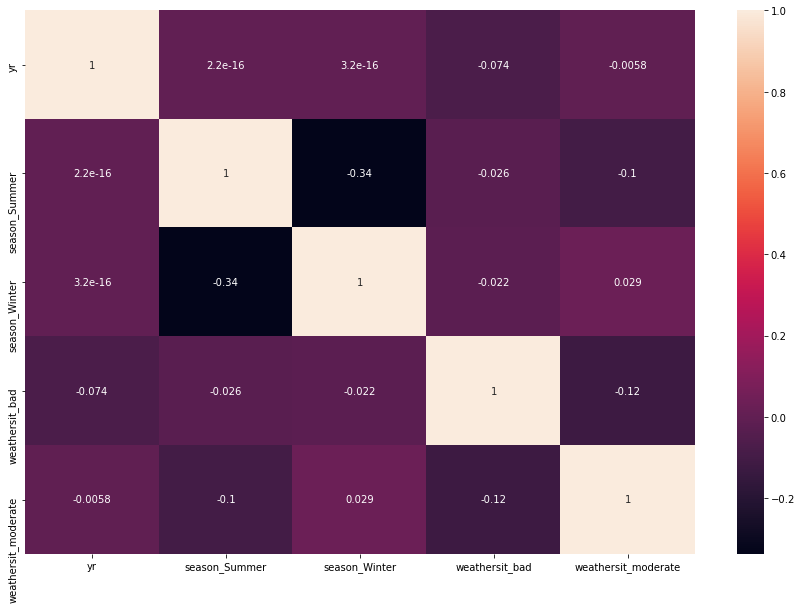

In [76]:
rebuild(col,'windspeed')

In [77]:
def rebuildAd(col, ad):
    col.append(ad)
    model(col)
    vif(col)
    plt.figure(figsize=(15,10))
    sns.heatmap(df[col].corr(), annot=True)
    plt.show()

##### Finding:
* The temp column seems to be relevant yet it was removed
* There was high correlation between cnt and temp

##### Let's add it back

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     334.7
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          3.26e-172
Time:                        09:35:45   Log-Likelihood:                -4182.2
No. Observations:                 511   AIC:                             8378.
Df Residuals:                     504   BIC:                             8408.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2274.8782    

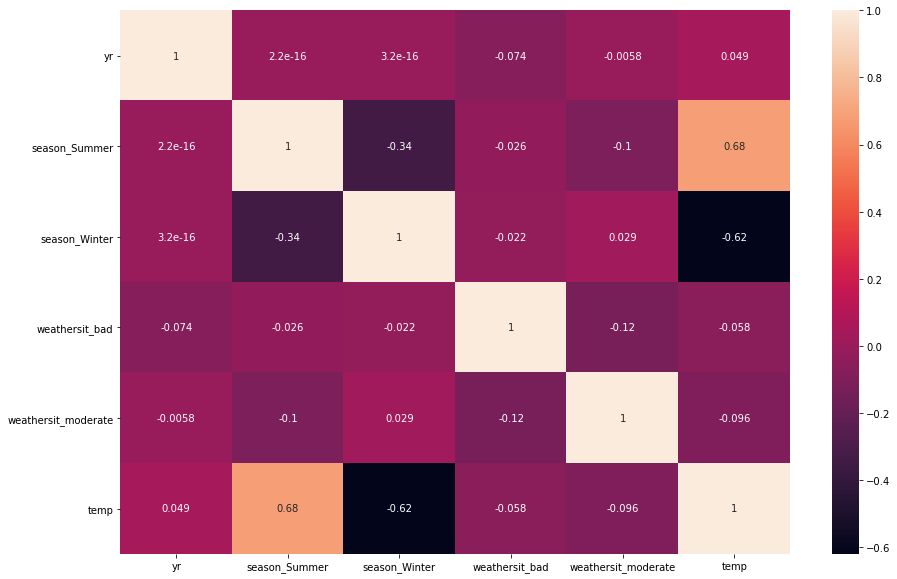

In [78]:
rebuildAd(col, 'temp')

##### Finding:
* The mnth_sept column seems to be relevant yet it was removed
* There was high correlation between cnt and mnth_sept

##### Let's add it back

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     308.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.27e-177
Time:                        09:35:45   Log-Likelihood:                -4167.1
No. Observations:                 511   AIC:                             8350.
Df Residuals:                     503   BIC:                             8384.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2191.1983    

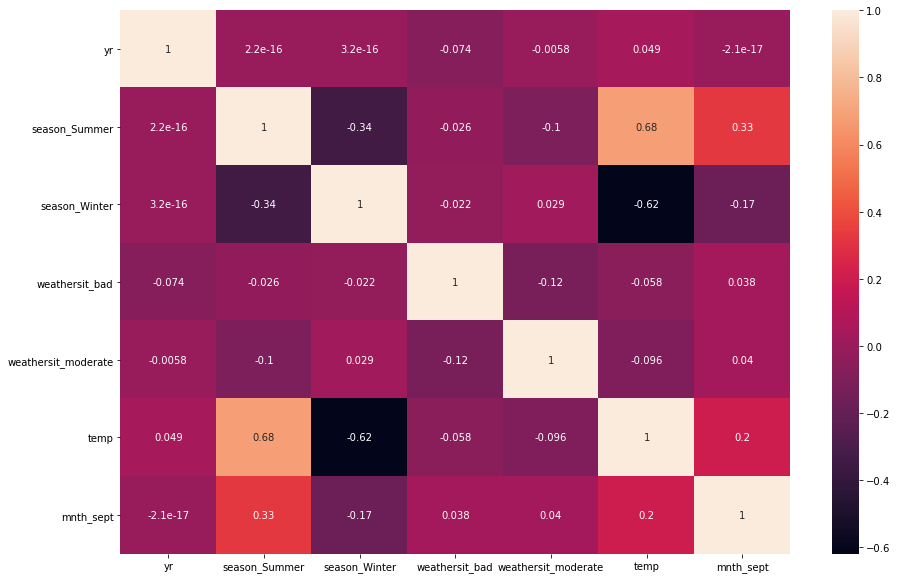

In [79]:
rebuildAd(col, 'mnth_sept')

### Inferences

- The p-values are all 0
- The VIF values are all below 5
- The R2 value is 0.811
- The adjusted R2 is 0.808
- The difference is very low thus we can add to this model

In [80]:
#Function to create a model
def build_model_using_sk(X,y):
    lr = LinearRegression()
    lr.fit(X,y)
    return lr

In [81]:
# Now let's build a model with the columns that we figured were enough
lreg = build_model_using_sk(X_train[col],y_train)
print("The intercept value is",lreg.intercept_)
print("The coefficients are: ",lreg.coef_)

The intercept value is 2191.1983297317825
The coefficients are:  [ 2004.17797592  -557.82993565 -1518.56603321 -2267.10026752
  -668.81533291  3707.66274708   778.66298927]


In [82]:
y_train_pred = lreg.predict(X_train[col])
y_train_pred

array([4739.46163243, 5024.35422295, 4851.67545077, 1232.1158493 ,
       6290.98651408, 6353.97042652, 5288.92569911, 3804.48982473,
       3419.49721542, 5926.84560471, 3981.59021335, 4720.77897999,
       5667.29599223, 3654.34210651, 6028.11446574, 6956.36348632,
       3665.89193098,  492.92708266,  890.5993864 , 6613.71715348,
       6709.96877075, 3648.23910493, 5549.21716349, 6692.76835785,
       6528.60993977, 3431.5663545 , 5057.92920953, 4701.52773255,
       1307.37184246, 1861.76341744, 1427.38837858, 1196.96280351,
       4917.12599612, 6583.58052756, 5659.59456927, 1750.78346398,
       1197.44061307, 1545.09098017, 4798.18939066, 6125.44056986,
       6724.9569559 , 3844.4768473 , 6386.15902458, 7029.51083471,
       4138.04720847, 5931.86746839, 1469.73927498, 4943.5054516 ,
       5249.60427309, 3804.48982473, 3389.77063035, 3585.56247424,
       4571.15057637, 7260.09728344, 6232.16290484, 3281.41863628,
       1096.29187022, 2639.86229265,  845.37747733, 4902.13781

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


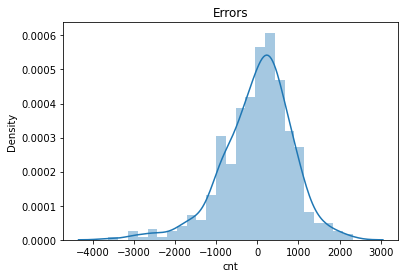

<Figure size 720x576 with 0 Axes>

In [83]:
#Let's plot the distplot to check if the central values are 0
sns.distplot(y_train-y_train_pred)
plt.title("Errors")
plt.figure(figsize=(10,8))
plt.show()

#### The error seems to be normally distributed and the mean is 0 thus the model seems to be good

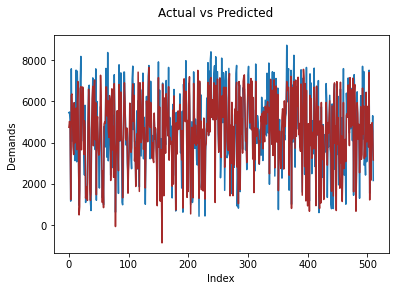

In [84]:
x = [i for i in range(len(X_train))]
plt.plot(x,y_train)
plt.plot(x,y_train_pred, color="brown")
plt.suptitle('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()


#### Plot for error terms

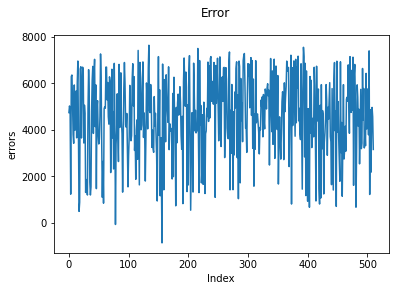

In [85]:
x = [i for i in range(len(X_train))]
plt.plot(x,y_train_pred)
plt.suptitle('Error')
plt.xlabel('Index')
plt.ylabel('errors')
plt.show()


##### Error terms seem to be independent

In [86]:
print(r2_score(y_train,y_train_pred))

0.8108884293728733


#### Inference:
* The R2 value seem to be same as we achieved in our final model

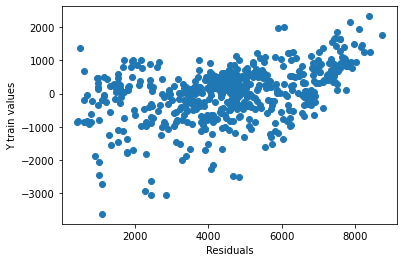

In [87]:
res = y_train-y_train_pred
plt.scatter(y_train, res)
plt.xlabel('Residuals')
plt.ylabel("Y train values")
plt.show()

#### Looks like the model is good to go , now let's evaluate based on the test values


In [88]:
# Scaling X_test

val = ['temp','atemp','hum','windspeed','days']
X_test[val] = scaler.transform(X_test[val])
X_test.head()

<ipython-input-88-212571acbc6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[val] = scaler.transform(X_test[val])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_Spring,season_Summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.641975,1,0,...,0,0,0,1,0,0,0,0,1,0
148,0,0,1,0.758058,0.704203,0.843709,0.479765,0.203018,1,0,...,0,0,0,0,0,1,0,0,1,0
302,0,0,1,0.324018,0.317998,0.642765,0.386287,0.414266,0,0,...,0,0,0,0,0,1,0,0,1,0
355,0,0,0,0.453814,0.455552,0.780592,0.062325,0.486968,0,0,...,0,0,1,0,0,0,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.706447,1,0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
y_test_pred = lreg.predict(X_test[col])
y_test_pred

array([6209.06325588, 5001.82316899, 3392.54916494, 1686.40740548,
       7063.7502673 , 4830.62663635, 1901.93370697, 2852.12168094,
       3655.41659336, 3261.64807423, 2938.25298883, 4627.81178916,
       1935.58065564, 3731.86179094, 5194.73182445, 3139.2892337 ,
       5985.76818927, 1263.182214  , 5894.85412113, 4274.18422684,
       3805.00913933, 4270.85513993, 5115.69560808, 6039.66429022,
       4948.33710889, 4940.63568592, 3420.57170227,  353.32666415,
       4582.59112709, 1839.3336583 , 3223.15019928, 3741.50477468,
       1096.53014978, 1608.66980367, 5574.89739641, 5029.18588024,
       3001.44893412, 3570.71942049,  511.82721544, 7207.17291025,
       2124.22624882, 5820.21762512, 4705.79079483, 5943.41729287,
       4532.54342765, 3024.02926848, 7213.89798552, 5013.89230808,
       4470.94128382, 6705.70570846, 4074.84075873, 4666.87825911,
       5866.41692304, 4982.00794648, 5292.77872055, 6706.11574931,
       3597.11229872, 6078.1667851 , 3971.52491657, 4959.88693

In [90]:
col

['yr',
 'season_Summer',
 'season_Winter',
 'weathersit_bad',
 'weathersit_moderate',
 'temp',
 'mnth_sept']

In [91]:
r2_score(y_test, y_test_pred)

0.8025448809308748

#### The r2_score for train was around 0.810 and for test it is 0.802 

* Looks like our model is performing well in unseen data/test data

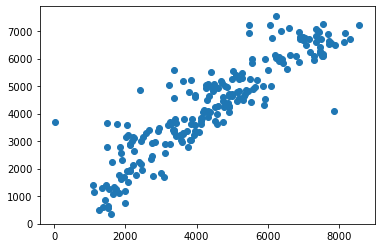

In [92]:
plt.scatter(y_test, y_test_pred)


* We can say that the variance of the residuals is constant

Text(0, 0.5, 'Counts')

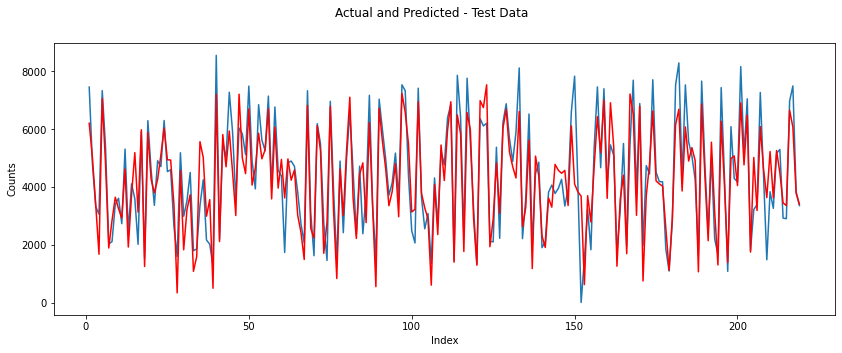

In [93]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test)
plt.plot(c,y_test_pred, color="red")
fig.suptitle('Actual and Predicted - Test Data')              
plt.xlabel('Index')                               
plt.ylabel('Counts')    

##### Inference:
* we can observe that the predicted values in test are very close to the actual values

Text(0, 0.5, 'Counts - Predicted Counts')

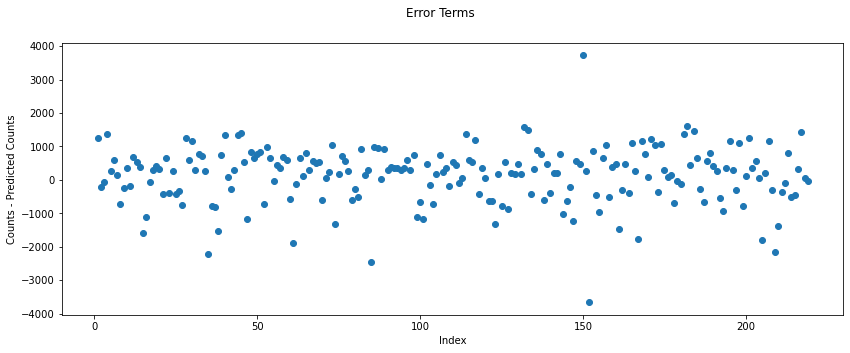

In [94]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.scatter(c,y_test-y_test_pred)
fig.suptitle('Error Terms')             
plt.xlabel('Index')                     
plt.ylabel('Counts - Predicted Counts') 

* There is no pattern in the error terms and predicted counts

In [95]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days,season_Spring,season_Summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,0,0,...,0,0,0,0,0,0,0,0,1,0


In [96]:
model(col)
vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     308.1
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.27e-177
Time:                        09:35:49   Log-Likelihood:                -4167.1
No. Observations:                 511   AIC:                             8350.
Df Residuals:                     503   BIC:                             8384.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2191.1983    

#### The above model states the following:

1. The company should expand it's business during Summer
2. The company should promote more during the month of September
3. The company should focus on times when the weather conditions are moderate
4. The company should wait till the COVID-19 times get better because yr column is very important
5. The Temperature factor is very important in bicycle usage, probably they should use the time of extreme low temperatures and bad weather conditions in winter to service the bicycles

In [97]:
col

['yr',
 'season_Summer',
 'season_Winter',
 'weathersit_bad',
 'weathersit_moderate',
 'temp',
 'mnth_sept']

## Conclusion:

##### The most significant factors to predict the usage of bicycles are :
* Year
* Summer season
* Winter season
* Weather conditions (especially moderate and bad weather conditions impact more)
* The temperature factors
* Months like January, July, September
* Windspeed
* Holidays